# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=False)


Loading dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]


# Methods

In [5]:
def plot_stages():
    dataframe = data_loader.processed_incidents_df.copy()

    initial_count = dataframe.shape[0]

    stages = ["Initial"]
    counts = [initial_count]

    # record stages
    dataframe = data_preprocessor._remove_duplicates(dataframe)
    stages.append("Remove duplicates")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_incomplete_years(dataframe)
    stages.append("Remove incomplete\nyears")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_outside_region(dataframe)
    stages.append("Remove incidents\noutside region")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_other_resource_types(dataframe)
    stages.append("Remove other\nresource types")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_extra_resources(dataframe)
    stages.append("Remove rows\ncounting aiding\nresources to\nan incident")
    counts.append(dataframe.shape[0])

    # plot
    _, ax = plt.subplots(figsize=(10, 6))

    ax.bar(stages, counts, color="tab:blue")

    for i, count in enumerate(counts):
        percentage = round((count / initial_count) * 100, 2)
        ax.text(i, count, f"{count} ({percentage}%)", ha="center", va="bottom")

    ax.set_xlabel("Stages")
    ax.set_ylabel("Total Incidents")
    plt.title("Dataset Reduction Across Stages")

    plt.gca().tick_params(axis="x", which="major", pad=5)

    plt.show()


# Main

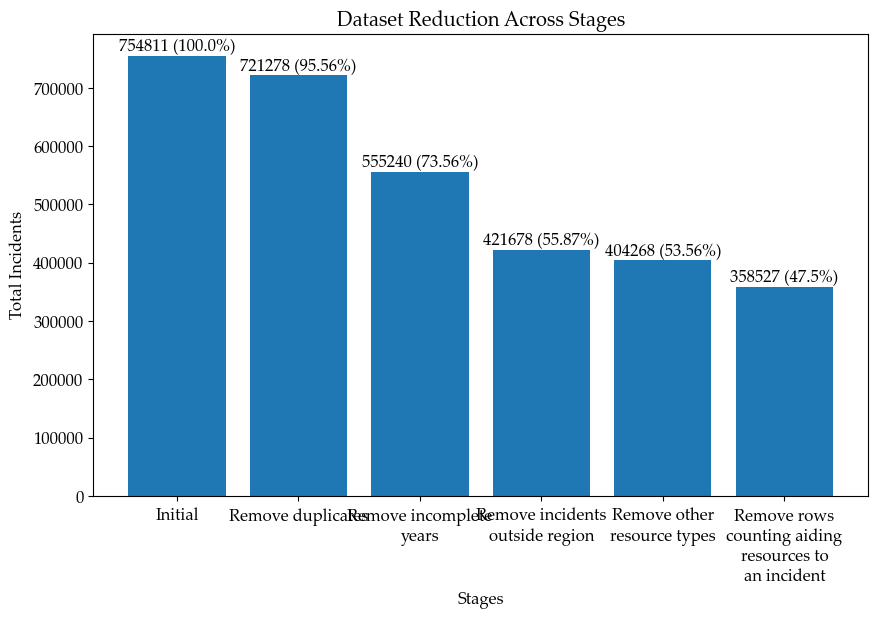

In [6]:
plot_stages()
